In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# Ejercicio VI.1

### La función de distribución asociada a la producción de una máquina, en miles de unidades, es la siguiente:

$$
F(x)= 
\left\{ 
  \begin{array}{lcc}
       0 &   si  & x < 0 \\
    \\ x\cdot(2-x) &  si & 0 \leq x \leq 1 \\
    \\ 1 &  si  & x > 1
  \end{array}
\right.
$$

### a) *Representarla gráficamente*

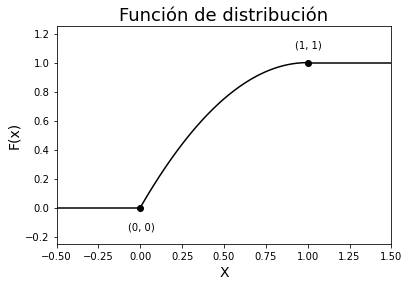

In [2]:
x = np.arange(0.0, 1.0, 0.001) #Secuencia de 1.000 puntos entre 0 y 1

plt.plot(x, 2*x-x**2, "k-")  #F(x) entre 0 y 1

plt.hlines(y = 0, xmin = -1, xmax = 0, colors = "black", linestyles = "solid")  #F(x) para valores menores de 0
plt.hlines(y = 1, xmin = 1, xmax = 2, colors = "black", linestyles = "solid") #F(x) para valores mayores de 1

plt.plot(0, 0, "ko") #Puntos de transición
plt.text(-0.075, -0.15, "(0, 0)")
plt.plot(1, 1, "ko")
plt.text(0.925, 1.1, "(1, 1)")

plt.xlim(-0.5, 1.5) #Ampliación de los ejes
plt.ylim(-0.25, 1.25)

plt.title("Función de distribución", fontsize = 18)
plt.xlabel("X", fontsize = 14)
plt.ylabel("F(x)", fontsize = 14)

plt.show()

### b) *Calcular y representar la función de densidad*

Por derivación:

In [3]:
x = sp.Symbol("x")

Fx0 = 0 #F(x) para valores menores de 0
Fx01 = 2*x-x**2 #F(x) entre 0 y 1
Fx1 = 1 #F(x) para valores mayores de 1

In [4]:
fx0 = sp.diff(Fx0)
fx0

0

In [5]:
fx01 = sp.diff(Fx01)
fx01

2 - 2*x

In [6]:
fx1 = sp.diff(Fx1)
fx1

0

Por tanto:

$$
f(x)= 
\left\{ 
  \begin{array}{lcc}
       2-2\cdot x &  si & 0 \leq x \leq 1 \\
    \\ 0 &  si & resto
  \end{array}
\right.
$$

Gráficamente:

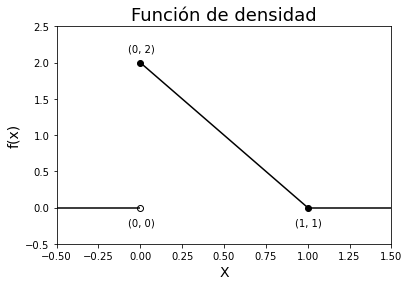

In [7]:
x = np.arange(0.0, 1.0, 0.001) #Secuencia de 1.000 puntos entre 0 y 1

plt.plot(x,  2-2*x, "k-")  #f(x) entre 0 y 1

plt.hlines(y = 0, xmin = -1, xmax = 0, colors = "black", linestyles = "solid")  #f(x) para valores menores de 0
plt.hlines(y = 0, xmin = 1, xmax = 2, colors = "black", linestyles = "solid") #f(x) para valores mayores de 1

plt.plot(0, 0, "ko", mfc = "none") #Puntos de transición
plt.text(-0.075, -0.25, "(0, 0)")
plt.plot(0, 2, "ko")
plt.text(-0.075, 2.15, "(0, 2)")
plt.plot(1, 0, "ko")
plt.text(0.925, -0.25, "(1, 1)")

plt.xlim(-0.5, 1.5) #Ampliación de los ejes
plt.ylim(-0.5, 2.5)

plt.title("Función de densidad", fontsize = 18)
plt.xlabel("X", fontsize = 14)
plt.ylabel("f(x)", fontsize = 14)

plt.show()

### c) *Obtener la media y la varianza de la producción*

La media viene dada por la esperanza matemática:

In [8]:
x = sp.Symbol("x")

E = sp.integrate(x * fx01, (x, 0, 1))

media = round(E * 1000, 2)
media

333.33

La varianza se puede calcular a partir de la esperanza:

In [9]:
EX2 = sp.integrate(x**2 * fx01, (x, 0, 1))

var = round((EX2 - E**2) * 1000, 2)
var

55.56

### d) *¿Cuál es la probabilidad de que la producción sea inferior a 500 unidades? ¿Y superior a 250?*

A partir de la función de densidad:

In [11]:
pXmenor500 = sp.integrate(fx01, (x, 0, 0.5))

pXmenor500Red = round(pXmenor500, 2)
pXmenor500Red #En realidad, menor o igual que

0.75

In [12]:
pXmayor250 = 1 - sp.integrate(fx01, (x, 0, 0.25))

pXmayor250Red = round(pXmayor250, 2)
pXmayor250Red

0.56